ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

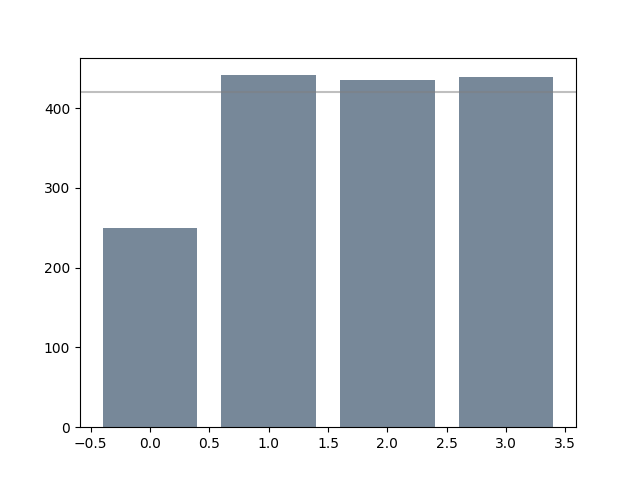

In [1]:
import pandas as pd
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.pyplot as plt

%matplotlib widget

np.random.seed(12345)
df = pd.DataFrame([np.random.normal(335,1500,300), 
                   np.random.normal(410,900,300), 
                   np.random.normal(410,1200,300), 
                   np.random.normal(480,550,300)], 
                  index=[1992,1993,1994,1995])

fig, ax = plt.subplots()

threshold = 420.
bars = plt.bar(range(df.shape[0]), df.mean(axis = 1), color = 'lightslategrey')
axline = plt.axhline(y = threshold, color = 'grey', alpha = 0.5)

cm1 = mcol.LinearSegmentedColormap.from_list("Test",["b", "white", "purple"])
cpick = cm.ScalarMappable(cmap=cm1) 
cpick.set_array([])
plt.colorbar(cpick, orientation='horizontal')

def percentages(threshold):
    percentages = []
    for bar in bars:
        percentage = (bar.get_height()-threshold)/bar.get_height()
        if percentage>1: percentage = 1
        if percentage<0: percentage=0
        percentages.append(percentage)
    return percentages

def update(threshold):
    axline.set_ydata(threshold)
    perc = percentages(threshold)
    for bar, p in zip(bars, perc):
        bar.set_color(cpick.to_rgba(p))

# update once before showing
update(threshold)

def onMouseMove(event):
    if event.inaxes == ax:
        update(event.ydata)
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', onMouseMove)

plt.xticks(range(df.shape[0]), df.index, alpha = 0.8)

plt.show()